In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
!pip install umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 1.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 5.3 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.5-py3-none-any.whl size=86831 sha256=3da36527f87ea0178069fa58cd2798e6a0435aa7db6f408b67c5446df7291fcc
  Stored in directory: /root/.cache/pip/wheels/3a/70/07/428d2b58660a1a3b431db59b806a10da736612ebbc66c1bcc5
Successfully built umap-learn


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE, MDS, Isomap, LocallyLinearEmbedding
from sklearn.preprocessing import StandardScaler
import umap

# Load the Iris dataset
df = pd.read_csv('/content/gdrive/MyDrive/Dataset/Iris.csv')
features = df.drop('Species', axis=1)
labels = df['Species']

# Standardizing the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

**PCA (Principal Component Analysis)**

Components = 1, Explained Variance = 0.7470533000277259
Components = 2, Explained Variance = 0.9314058689070457
Components = 3, Explained Variance = 0.9782321131121339


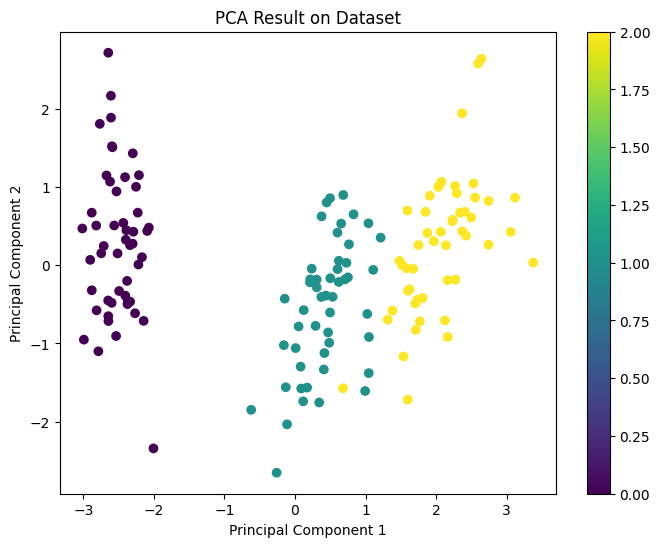

In [15]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder

# Encode string labels to integers
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

# Varying number of components for PCA
for n in range(1, 4):
    pca = PCA(n_components=n)
    pca.fit(features_scaled)
    print(f"Components = {n}, Explained Variance = {np.sum(pca.explained_variance_ratio_)}")

# Applying PCA with 2 components for visualization
pca_vis = PCA(n_components=2)
features_pca = pca_vis.fit_transform(features_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(features_pca[:, 0], features_pca[:, 1], c=labels_encoded)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Result on Dataset')
plt.colorbar()  # Optional: Adds a color bar to interpret the labels
plt.show()

**MDS (Multidimensional Scaling)**

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


Components = 1, Stress = 9978.623256388077


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


Components = 2, Stress = 532.1927512617385


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


Components = 3, Stress = 63.67575583314668


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


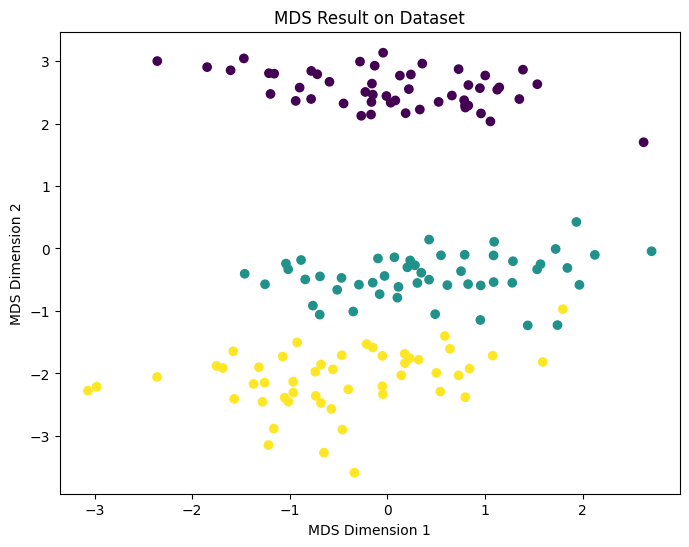

In [17]:
from sklearn.manifold import MDS

# Using different numbers of components
for n in range(1, 4):
    mds = MDS(n_components=n)
    mds.fit(features_scaled)
    print(f"Components = {n}, Stress = {mds.stress_}")

mds = MDS(n_components=2)
features_mds = mds.fit_transform(features_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(features_mds[:, 0], features_mds[:, 1], c=labels_encoded)
plt.xlabel('MDS Dimension 1')
plt.ylabel('MDS Dimension 2')
plt.title('MDS Result on Dataset')
plt.show()

**ISOMap**

Components = 2, Neighbors = 5, Reconstruction Error = 0.5119327474792192
Components = 2, Neighbors = 10, Reconstruction Error = 0.43122692790385314
Components = 2, Neighbors = 15, Reconstruction Error = 0.3294914056339295
Components = 3, Neighbors = 5, Reconstruction Error = 0.4649768141549592
Components = 3, Neighbors = 10, Reconstruction Error = 0.3272859930794409
Components = 3, Neighbors = 15, Reconstruction Error = 0.24080143618892763
Components = 4, Neighbors = 5, Reconstruction Error = 0.43311731051369967
Components = 4, Neighbors = 10, Reconstruction Error = 0.26070835563323963
Components = 4, Neighbors = 15, Reconstruction Error = 0.18912585855948902


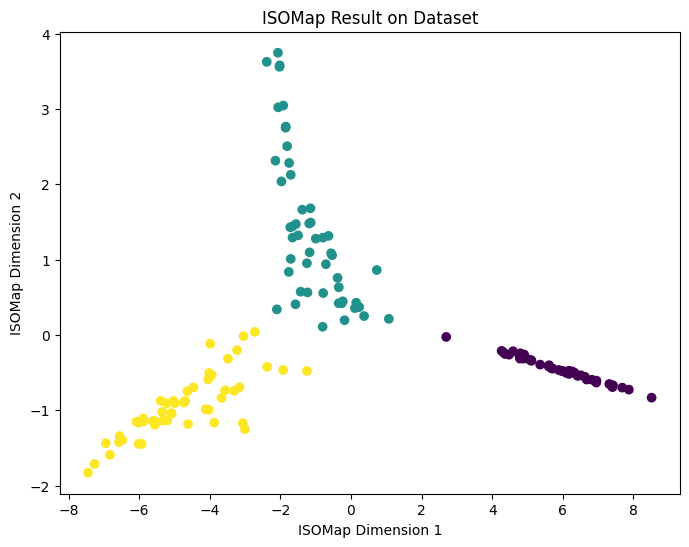

In [19]:
from sklearn.manifold import Isomap

# Varying number of components and neighbors
for n in range(2, 5):
    for neighbors in [5, 10, 15]:
        isomap = Isomap(n_components=n, n_neighbors=neighbors)
        isomap.fit(features_scaled)
        print(f"Components = {n}, Neighbors = {neighbors}, Reconstruction Error = {isomap.reconstruction_error()}")

isomap = Isomap(n_components=2)
features_isomap = isomap.fit_transform(features_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(features_isomap[:, 0], features_isomap[:, 1], c=labels_encoded)
plt.xlabel('ISOMap Dimension 1')
plt.ylabel('ISOMap Dimension 2')
plt.title('ISOMap Result on Dataset')
plt.show()

**LLE (Locally Linear Embedding)**

Components = 2, Neighbors = 5, Reconstruction Error = 9.657935787229526e-09
Components = 2, Neighbors = 10, Reconstruction Error = 1.1744165600064299e-07
Components = 2, Neighbors = 15, Reconstruction Error = 2.4053140930665216e-06
Components = 3, Neighbors = 5, Reconstruction Error = 1.0009162546742851e-06
Components = 3, Neighbors = 10, Reconstruction Error = 3.232310710170173e-06
Components = 3, Neighbors = 15, Reconstruction Error = 5.1620690958595855e-06
Components = 4, Neighbors = 5, Reconstruction Error = 8.203628655959223e-06
Components = 4, Neighbors = 10, Reconstruction Error = 6.876473603840402e-06
Components = 4, Neighbors = 15, Reconstruction Error = 1.560301804112366e-05


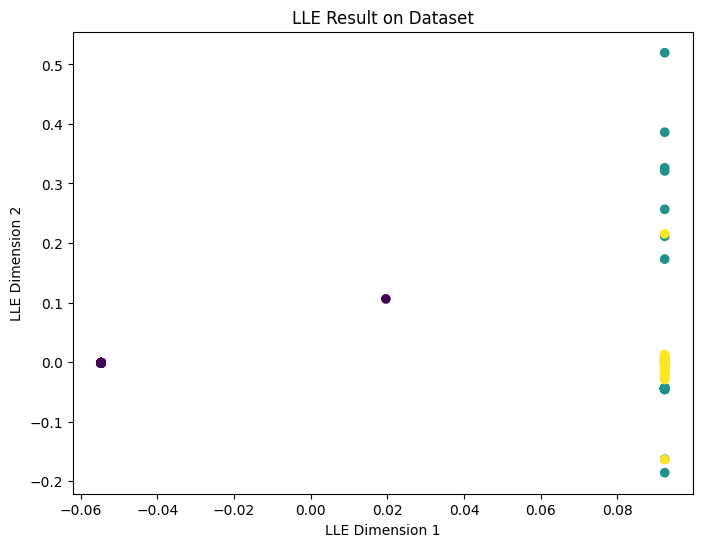

In [20]:
from sklearn.manifold import LocallyLinearEmbedding

# Varying number of components and neighbors
for n in range(2, 5):
    for neighbors in [5, 10, 15]:
        lle = LocallyLinearEmbedding(n_components=n, n_neighbors=neighbors)
        lle.fit(features_scaled)
        print(f"Components = {n}, Neighbors = {neighbors}, Reconstruction Error = {np.sum(lle.reconstruction_error_)}")

lle = LocallyLinearEmbedding(n_components=2)
features_lle = lle.fit_transform(features_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(features_lle[:, 0], features_lle[:, 1], c=labels_encoded)
plt.xlabel('LLE Dimension 1')
plt.ylabel('LLE Dimension 2')
plt.title('LLE Result on Dataset')
plt.show()

**UMAP (Uniform Manifold Approximation and Projection)**

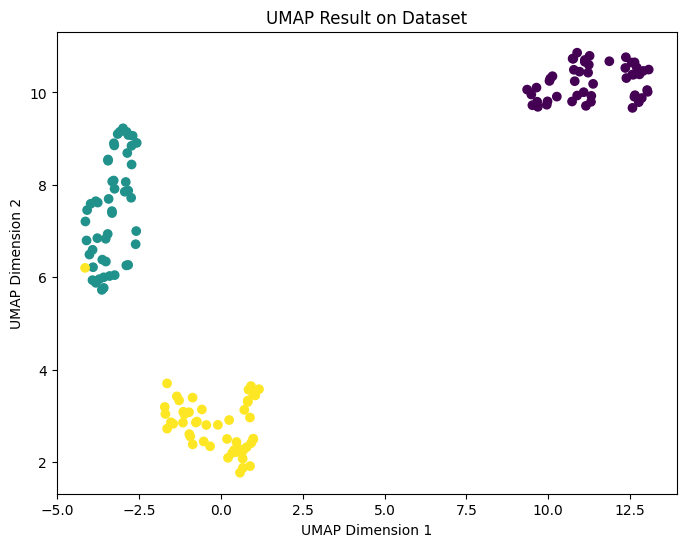

In [21]:
import umap

# Varying number of neighbors and min_dist
for n in [5, 15, 30]:
    for min_dist in [0.1, 0.5, 0.99]:
        reducer = umap.UMAP(n_neighbors=n, min_dist=min_dist)
        embedding = reducer.fit_transform(features_scaled)

reducer = umap.UMAP()
features_umap = reducer.fit_transform(features_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(features_umap[:, 0], features_umap[:, 1], c=labels_encoded)
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.title('UMAP Result on Dataset')
plt.show()


**t-SNE (t-distributed Stochastic Neighbor Embedding)**

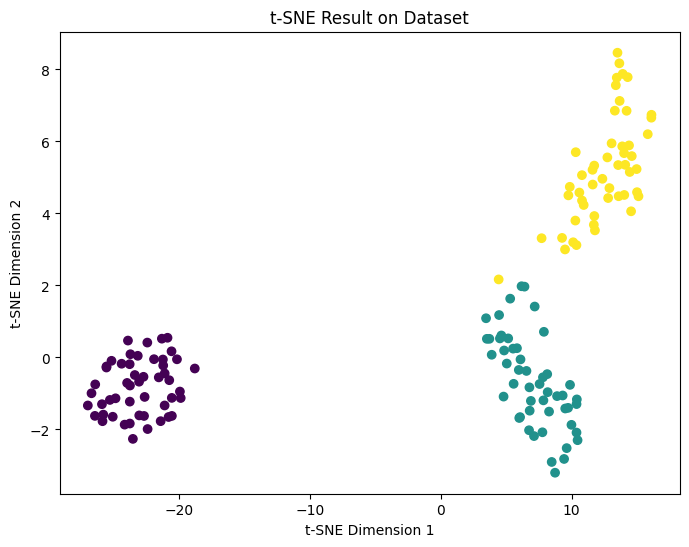

In [22]:
from sklearn.manifold import TSNE

# Varying perplexities for t-SNE
for perplexity in [5, 30, 50, 100]:
    tsne = TSNE(n_components=2, perplexity=perplexity)
    features_tsne = tsne.fit_transform(features_scaled)

tsne = TSNE(n_components=2, perplexity=30)  # Example perplexity value
features_tsne = tsne.fit_transform(features_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(features_tsne[:, 0], features_tsne[:, 1], c=labels_encoded)
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.title('t-SNE Result on Dataset')
plt.show()

